In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

C:\Users\Operator\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

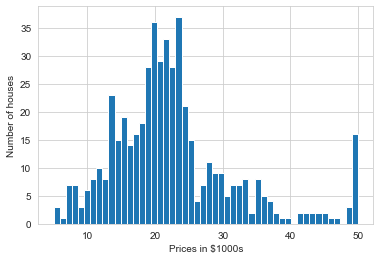

In [6]:
plt.hist(boston.target, bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

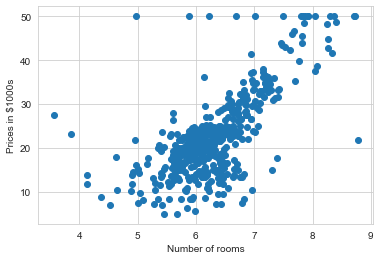

In [7]:
plt.scatter(boston.data[:,5], boston.target)

plt.ylabel('Prices in $1000s')
plt.xlabel('Number of rooms')

In [8]:
boston_df = DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


C:\Users\Operator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


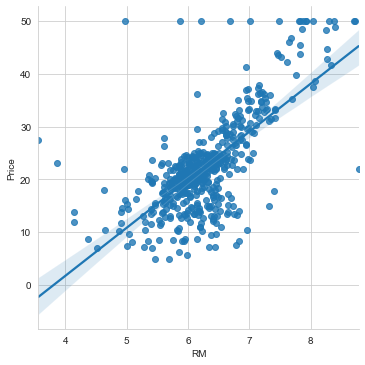

In [10]:
sns.lmplot('RM','Price', data = boston_df)

In [11]:
X = boston_df.RM

In [12]:
X = np.vstack(boston_df.RM)
X.shape

(506, 1)

In [13]:
Y = boston_df.Price

In [14]:
X = np.array( [[value, 1] for value in X])

<ipython-input-14-ddfca32f60f8>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array( [[value, 1] for value in X])


In [15]:
X

array([[array([6.575]), 1],
       [array([6.421]), 1],
       [array([7.185]), 1],
       ...,
       [array([6.976]), 1],
       [array([6.794]), 1],
       [array([6.03]), 1]], dtype=object)

In [16]:
X = X.astype('float64')
Y = Y.astype('float64')
m, b = np.linalg.lstsq(X, Y)[0]

<ipython-input-16-e67d9277e4dc>:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, b = np.linalg.lstsq(X, Y)[0]


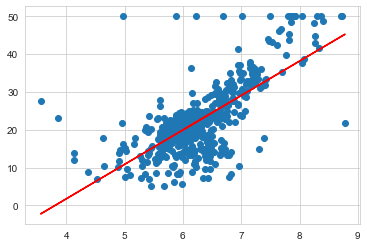

In [17]:
plt.plot(boston_df.RM, boston_df.Price,'o')

x = boston_df.RM

plt.plot(x, x*m +b, 'r', label = 'Best Fit Line')

In [18]:
result = np.linalg.lstsq(X,Y)

error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print('The root mean square error was %.2f' %rmse)

The root mean square error was 6.60


<ipython-input-18-e3feb5e69bfe>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result = np.linalg.lstsq(X,Y)


In [19]:
import sklearn 
from sklearn.linear_model import LinearRegression

In [20]:
lreg = LinearRegression()

In [21]:
X_multi = boston_df.drop('Price',1)

Y_target = boston_df.Price

<ipython-input-21-6cae50faa2b5>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_multi = boston_df.drop('Price',1)


In [22]:
lreg.fit(X_multi, Y_target)


LinearRegression()

In [23]:
print('The estimated intercept coefficient is %.2f' %lreg.intercept_)

The estimated intercept coefficient is 36.46


In [24]:
print('The number of coefficients used %d' %len(lreg.coef_))

The number of coefficients used 13


In [25]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.colums = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)

coeff_df

<ipython-input-25-a7f07ebadef9>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  coeff_df.colums = ['Features']


,0,Coefficient Estimate
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


In [26]:
from sklearn.model_selection import train_test_split


In [27]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, boston_df.Price)

In [28]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(379, 2) (127, 2) (379,) (127,)


In [29]:
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression()

In [30]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)


In [31]:
print('Fit a model X_train, and calculate the MSE with Y_train: %.2f' %np.mean(Y_train - pred_train)**2)

print('Fit a model X_train, and calculate the MSE with X_test and Y_test: %.2f' %np.mean(Y_test - pred_test)**2)

Fit a model X_train, and calculate the MSE with Y_train: 0.00
Fit a model X_train, and calculate the MSE with X_test and Y_test: 0.42


Text(0.5, 1.0, 'Residual Plots')

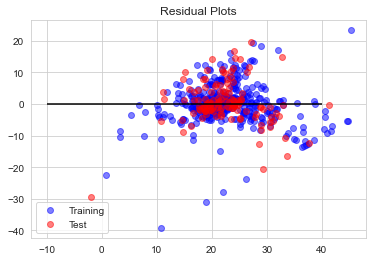

In [32]:
train = plt.scatter(pred_train,(pred_train - Y_train), c='b', alpha=0.5)

test = plt.scatter(pred_test,(pred_test-Y_test), c='r', alpha=0.5)

plt.hlines(y=0,xmin=-10,xmax=40, color ='black')

plt.legend((train, test), ('Training','Test'), loc='lower left')

plt.title('Residual Plots')

Logistic Regression

In [33]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import math 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [34]:
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.api as sm

C:\Users\Operator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Operator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [35]:
df = sm.datasets.fair.load_pandas().data

In [36]:
df.head

<bound method NDFrame.head of       rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0               3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1               3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2               4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3               4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4               5.0  27.0          9.0       1.0        1.0  14.0         3.0   
...             ...   ...          ...       ...        ...   ...         ...   
6361            5.0  32.0         13.0       2.0        3.0  17.0         4.0   
6362            4.0  32.0         13.0       1.0        1.0  16.0         5.0   
6363            5.0  22.0          2.5       0.0        2.0  14.0         3.0   
6364            5.0  32.0          6.0       1.0        3.0  14.0         3.0   
6365            4.0  22.0          2.5       0.0        2.0  16.0         2.0  

In [37]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [38]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [39]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [40]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


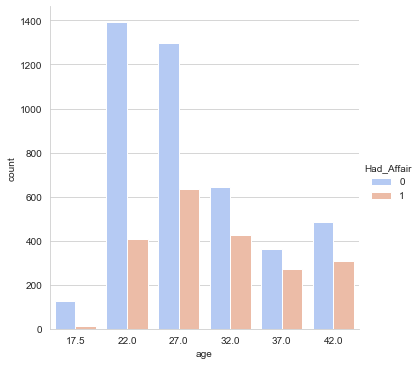

In [41]:
sns.catplot(x='age', data=df, hue='Had_Affair', kind='count', palette='coolwarm')


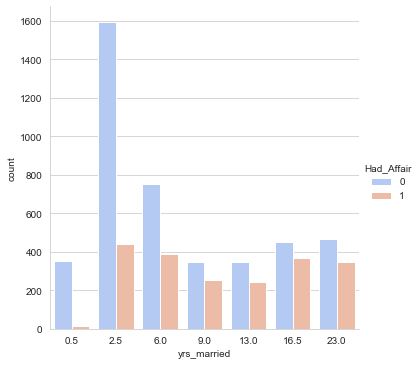

In [42]:
sns.catplot(x='yrs_married', data=df, hue='Had_Affair', kind='count', palette='coolwarm')


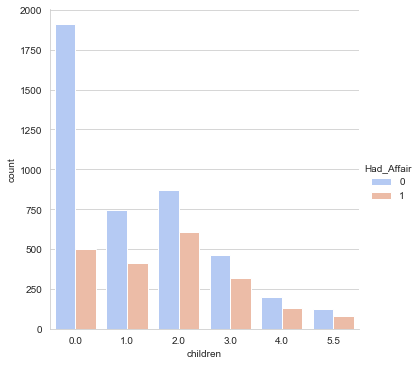

In [43]:
sns.catplot(x='children', data=df, hue='Had_Affair', kind='count', palette='coolwarm')


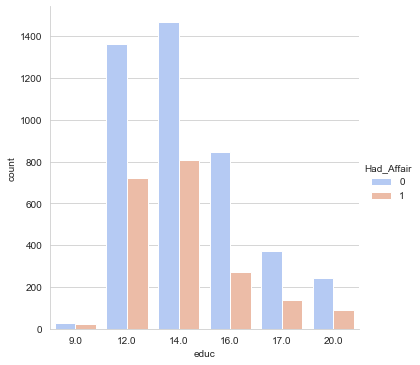

In [44]:
sns.catplot(x='educ', data=df, hue='Had_Affair', kind='count', palette='coolwarm')


In [45]:
occ_dummies = pd.get_dummies(df['occupation'])

In [46]:
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [47]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']

In [48]:
hus_occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']

In [49]:
X = df.drop(['occupation', 'occupation_husb', 'Had_Affair'], axis = 1)

In [50]:
dummies = pd.concat([occ_dummies, hus_occ_dummies], axis=1)

In [51]:
X = pd.concat([X,dummies],axis=1)

In [52]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,occ1,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [53]:
Y = df.Had_Affair
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [54]:
X = X.drop('occ1', axis=1)

In [55]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ2,occ3,occ4,occ5,occ6,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0


In [56]:
X = X.drop('affairs', axis=1)

In [57]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [58]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [59]:
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [60]:
log_model = LogisticRegression()

log_model.fit(X,Y)
log_model.score(X,Y)

C:\Users\Operator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7262016965127238

In [61]:
Y.mean()

0.3224945020420987

In [62]:
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

In [63]:
coeff_df

,0,1
0,rate_marriage,[-0.7194219093781641]
1,age,[-0.054546543297263266]
2,yrs_married,[0.10251414194585673]
3,children,[0.014784670596469355]
4,religious,[-0.3706209420995807]
5,educ,[0.0194374697030646]
6,occ2,[0.35719342884790145]
7,occ3,[0.5936061308135973]
8,occ4,[0.3118230024549912]
9,occ5,[0.9629493540087151]


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [65]:
log_model2 = LogisticRegression()

log_model2.fit(X_train, Y_train)

C:\Users\Operator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [66]:
class_predict = log_model2.predict(X_test)


In [67]:
print(metrics.accuracy_score(Y_test,class_predict))

0.7267587939698492


Multi-Class Classification

In [68]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import math 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [69]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [70]:
iris = load_iris()

X = iris.data
Y = iris.target

In [71]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [72]:
iris_data=DataFrame(X,columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

In [73]:
iris_target=DataFrame(Y,columns=['Species'])

In [74]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [75]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [76]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [77]:
iris_target.tail()

,Species
145,Virginica
146,Virginica
147,Virginica
148,Virginica
149,Virginica


In [78]:
iris = pd.concat([iris_data,iris_target], axis=1)
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


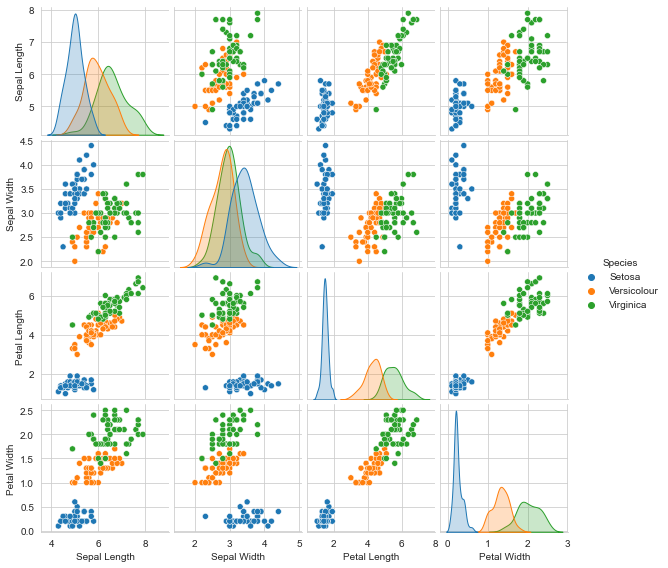

In [79]:
sns.pairplot(iris, hue = 'Species', height = 2)

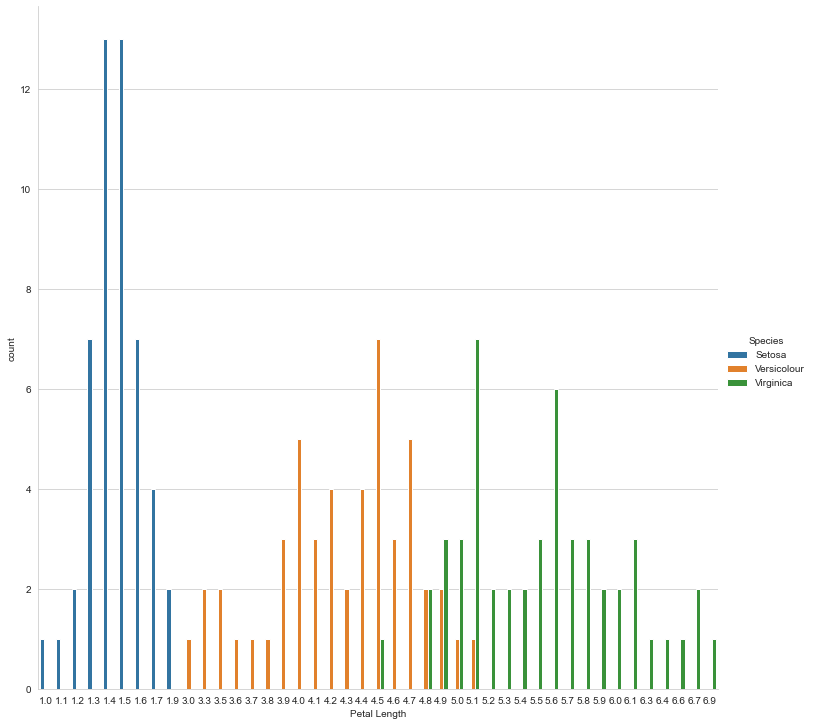

In [80]:
sns.catplot(x = 'Petal Length', data = iris, hue = 'Species', kind = 'count', height = 10)

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [82]:
logreg = LogisticRegression()

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=3)

In [84]:
logreg.fit(X_train,Y_train)

C:\Users\Operator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
from sklearn import metrics

In [86]:
Y_pred = logreg.predict(X_test)


In [87]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn = KNeighborsClassifier(n_neighbors=6)

In [90]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=6)

In [91]:
Y_pred = knn.predict(X_test)

In [92]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.95


In [93]:
knn = KNeighborsClassifier(n_neighbors=1)

In [94]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [95]:
Y_pred = knn.predict(X_test)

In [96]:
print(metrics.accuracy_score(Y_test,Y_pred))

0.9666666666666667


In [97]:
k_range = range(1,21)
accuracy = []


In [98]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

Text(0, 0.5, 'Testing Accuracy')

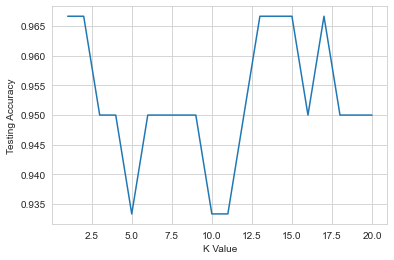

In [99]:
plt.plot(k_range,accuracy)
plt.xlabel('K Value')
plt.ylabel('Testing Accuracy')


In [100]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
from sklearn import datasets

In [102]:
iris = datasets.load_iris()

X = iris.data

Y = iris.target

In [103]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [104]:
from sklearn.svm import SVC

In [105]:
model = SVC()

In [106]:
from sklearn.model_selection import train_test_split


In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state=3)

In [108]:
model.fit(X_train, Y_train)

SVC()

In [109]:
from sklearn import metrics

In [110]:
predicted = model.predict(X_test)

expected = Y_test

In [111]:
print(metrics.accuracy_score(expected,predicted))

0.95


In [112]:
from sklearn import svm

In [113]:
X = iris.data[:,:2]

Y = iris.target

In [114]:
C = 1.0

In [115]:
svc = svm.SVC(kernel='linear', C=C).fit(X,Y)

In [116]:
rbf_svc = svm.SVC(kernel='rbf', gamma = 0.7, C=C).fit(X,Y)

In [117]:
poly_svc = svm.SVC(kernel='poly', degree= 3, C=C).fit(X,Y)

In [118]:
rbf_svc = svm.SVC(kernel='rbf', gamma = 0.7, C=C).fit(X,Y)

In [119]:
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

C:\Users\Operator\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [120]:
h = 0.02

x_min = X[:,0].min()-1

x_max = X[:,0].max()+1

In [121]:
y_min = X[:,1].min()-1

y_max = X[:,1].max()+1

In [122]:
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

In [123]:
titles = ['SVC with linear kernel','LinearSVC','SVC with RBF kernel','SVC with polynomial']

<ipython-input-124-7a8606cca64a>:9: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths = 0)
<ipython-input-124-7a8606cca64a>:9: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths = 0)
<ipython-input-124-7a8606cca64a>:9: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths = 0)
<ipython-input-124-7a8606cca64a>:9: UserWarning: linewidths is ignored by contourf
  plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths = 0)


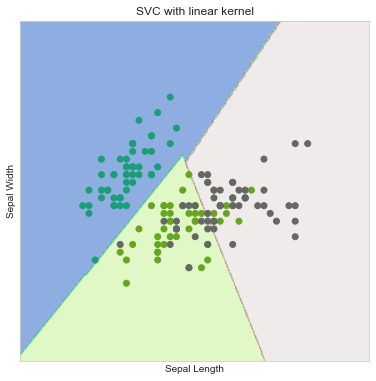

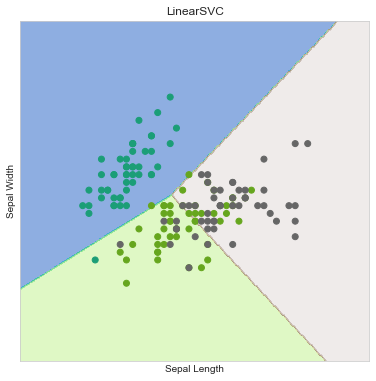

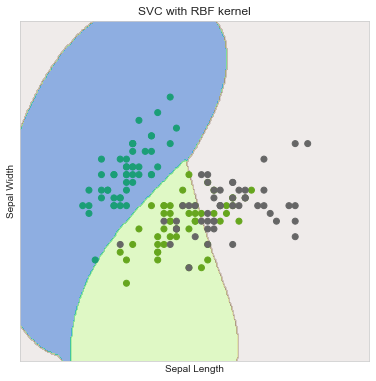

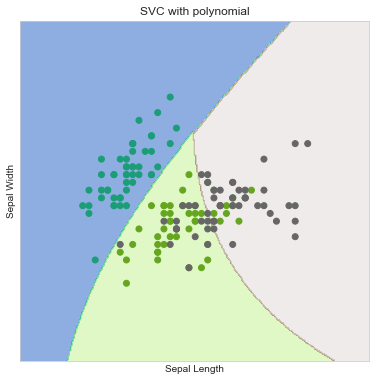

In [124]:
for i,clf in enumerate((svc, lin_svc,rbf_svc,poly_svc)):
    plt.figure(figsize=(15,15))
    plt.subplot(2,2,i+1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z =clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap=plt.cm.terrain,alpha=0.5,linewidths = 0)
    
    plt.scatter(X[:,0],X[:,1],c=Y, cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
      
        
    plt.xticks(())
    plt.yticks(())
  

    plt.title(titles[i])

    

Naive Bayes

In [125]:
from sklearn.naive_bayes import GaussianNB

In [126]:
model = GaussianNB()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
model.fit(X_train, Y_train)

GaussianNB()

In [127]:
predicted = model.predict(X_test)

expected = Y_test

In [128]:
print(metrics.accuracy_score(expected,predicted))

0.7631578947368421


Regression Trees and Random Forest

In [129]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [130]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=500, centers=4, random_state=8, cluster_std=2.4)


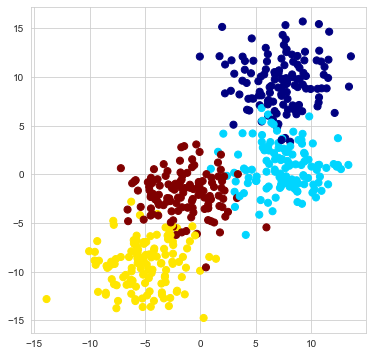

In [131]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='jet')

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

<ipython-input-133-871ba2f89980>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')


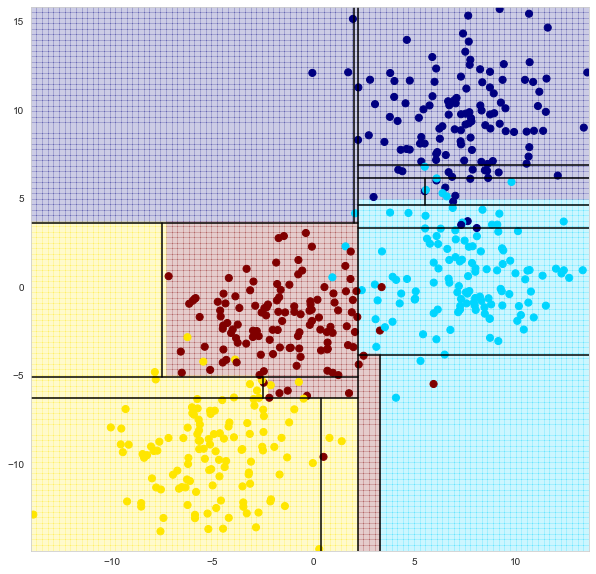

In [134]:
clf = DecisionTreeClassifier(max_depth=4,random_state=0)

visualize_tree(clf,X,y)

<ipython-input-133-871ba2f89980>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')


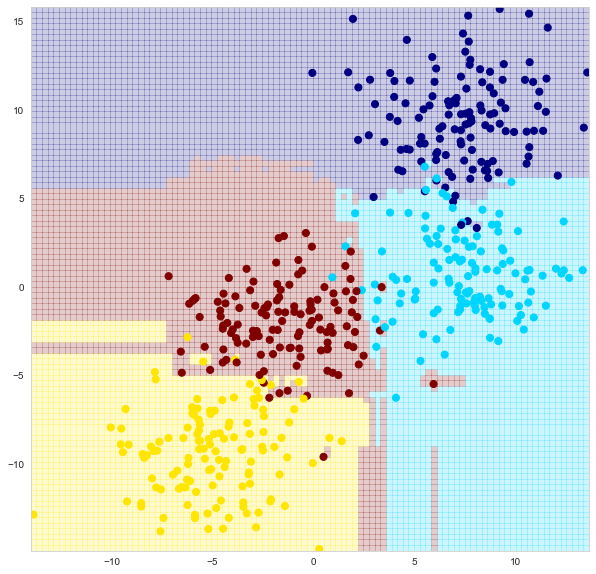

In [135]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, random_state=0)

visualize_tree(clf,X,y, boundaries=False)

<ErrorbarContainer object of 3 artists>

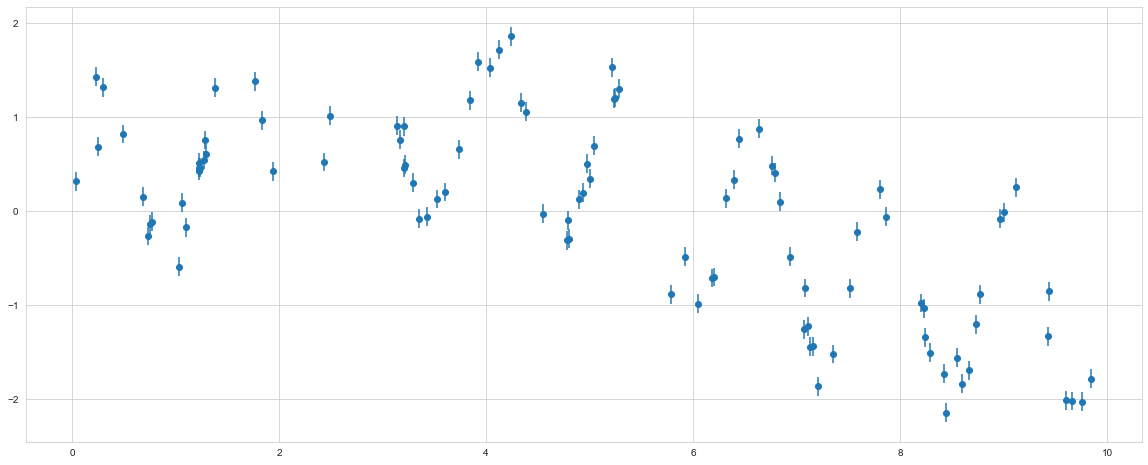

In [136]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2):

    noise = sigma * np.random.randn(len(x))

    return np.sin(5 * x) + np.sin(0.5 * x) + noise

y = sin_model(x)

plt.figure(figsize=(20,8))
plt.errorbar(x, y, 0.1, fmt='o')

In [137]:
xfit = np.linspace(0,10,1000)



In [138]:
rfr = RandomForestRegressor(100)
rfr.fit(x[:,None],y)
yfit = rfr.predict(xfit[:,None])

In [139]:
ytrue = sin_model(xfit,0)

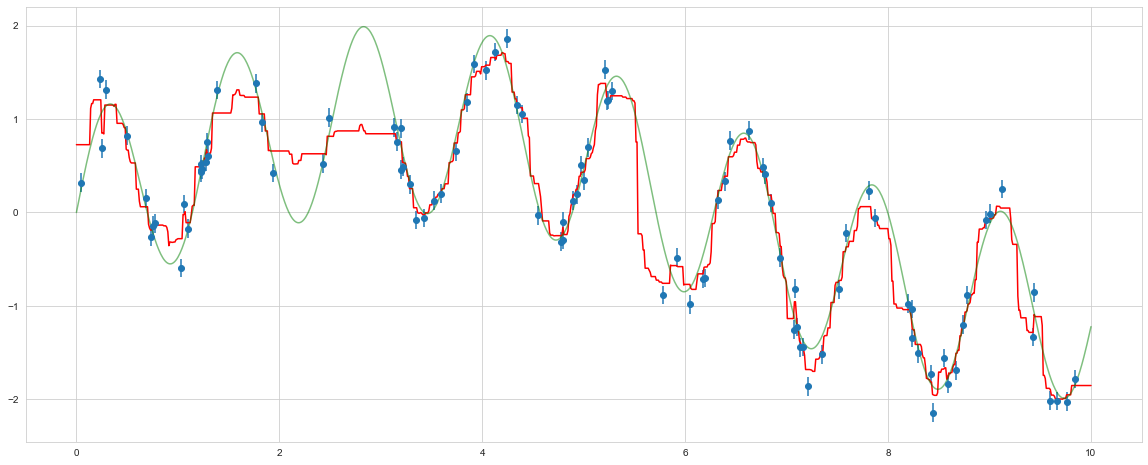

In [140]:
plt.figure(figsize=(20,8))

plt.errorbar(x, y, 0.1, fmt='o')

plt.plot(xfit,yfit,'-r')

plt.plot(xfit,ytrue,'-g', alpha = 0.5)

In [141]:
import pandas

In [142]:
messages = [line.rstrip() for line in open('C:\\Users\\Operator\\OneDrive\\Pulpit\\kurs\\SMSSpamCollection', encoding='utf-8')]
print(len(messages))

5574


In [143]:
for num, message in enumerate(messages[:10]):
    print(num,message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

In [144]:
import pandas 

messages = pandas.read_csv('C:\\Users\\Operator\\OneDrive\\Pulpit\\kurs\\SMSSpamCollection', sep='\t', names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [145]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [146]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [147]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [148]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

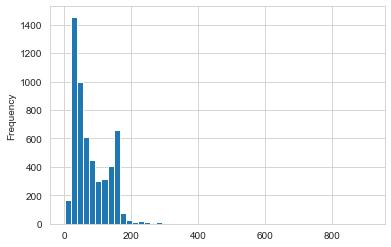

In [150]:
messages['length'].plot(bins=50, kind='hist') 


In [151]:
messages['length'].describe()


count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [152]:
messages[messages['length'] == 910]['message'].iloc[0] 


"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

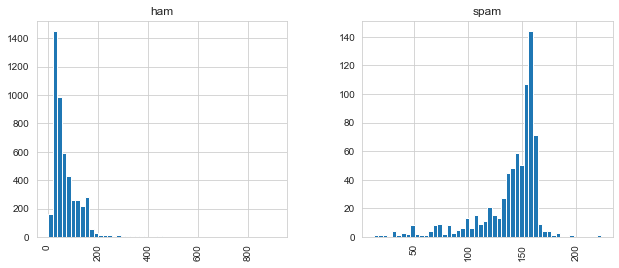

In [153]:
messages.hist(column='length', by='label', bins=50,figsize=(10,4))

In [154]:
import string

mess = 'Sample message! Notice: it has punctuation.'

In [155]:
nopunc = [char for char in mess if char not in string.punctuation]

nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [156]:
nopunc = ''.join(nopunc)

In [157]:
nopunc

'Sample message Notice it has punctuation'

In [158]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [159]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [160]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [161]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [162]:
def text_process(mess):

    nopunc = [char for char in mess if char not in string.punctuation]
   
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [163]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [164]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [165]:
from sklearn.feature_extraction.text import CountVectorizer

In [167]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer.fit(messages['message'])


CountVectorizer(analyzer=<function text_process at 0x0000021EBB105700>)

In [168]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [169]:
bow4 = bow_transformer.transform([message4])

In [170]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [171]:
print(bow_transformer.get_feature_names()[9554])

say


In [172]:
messages_bow = bow_transformer.transform(messages['message'])

In [173]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.08%


In [174]:
from sklearn.feature_extraction.text import TfidfTransformer

In [175]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [176]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

3.2800524267409408


In [177]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 11425)


In [178]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [ ]:
print('predicted:', spam_detect_model.predict(tfidf4)[0])
print('expected:', messages.label[3])

In [ ]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(messages['label'], all_predictions) )

In [ ]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  
    ('tfidf', TfidfTransformer()), 
    ('classifier', MultinomialNB()), 
])

In [ ]:
pipeline.fit(msg_train,label_train)

In [ ]:
predictions = pipeline.predict(msg_test)

In [ ]:
print(classification_report(predictions,label_test))